**Importing Dataset and Libraries**

In [1]:
from statsbombpy import sb
import warnings
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from mplsoccer.pitch import Pitch
import seaborn as sns
import networkx as nx
import numpy as np
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go

In [2]:
# Suppress NoAuthWarning
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
# Set display options to show all columns and rows
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

**Overview of the Dataset**

In [4]:
sb.competitions()

competition_id  season_id   country_name        competition_name  \
0                9         27        Germany           1. Bundesliga   
1             1267        107         Africa  African Cup of Nations   
2               16          4         Europe        Champions League   
3               16          1         Europe        Champions League   
4               16          2         Europe        Champions League   
..             ...        ...            ...                     ...   
66              55         43         Europe               UEFA Euro   
67              35         75         Europe      UEFA Europa League   
68              53        106         Europe       UEFA Women's Euro   
69              72        107  International       Women's World Cup   
70              72         30  International       Women's World Cup   

   competition_gender  competition_youth  competition_international  \
0                male              False                      False   
1                male              False                       True   
2                male              False                      False   
3                male              False                      False   
4                male              False                      False   
..                ...                ...                        ...   
66               male              False                       True   
67               male              False                      False   
68             female              False                       True   
69             female              False                       True   
70             female              False                       True   

   season_name               match_updated           match_updated_360  \
0    2015/2016  2023-12-12T07:43:33.436182                        None   
1         2023  2024-02-14T05:41:27.566989                        None   
2    2018/2019  2023-03-07T12:20:48.118250     2021-06-13T16:17:31.694   
3    2017/2018  2021-08-27T11:26:39.802832     2021-06-13T16:17:31.694   
4    2016/2017  2021-08-27T11:26:39.802832     2021-06-13T16:17:31.694   
..         ...                         ...                         ...   
66        2020  2023-02-24T21:26:47.128979  2023-04-27T22:38:34.970148   
67   1988/1989  2023-06-18T19:28:39.443883     2021-06-13T16:17:31.694   
68        2022  2023-10-24T03:36:54.066267  2023-10-24T03:37:29.085948   
69        2023  2023-12-12T14:06:50.626363  2023-12-12T14:12:41.561162   
70        2019  2023-07-27T10:33:48.273734     2021-06-13T16:17:31.694   

           match_available_360             match_available  
0                         None  2023-12-12T07:43:33.436182  
1                         None  2024-02-14T05:41:27.566989  
2                         None  2023-03-07T12:20:48.118250  
3                         None  2021-01-23T21:55:30.425330  
4                         None            2020-07-29T05:00  
..                         ...                         ...  
66  2023-04-27T22:38:34.970148  2023-02-24T21:26:47.128979  
67                        None  2023-06-18T19:28:39.443883  
68  2023-10-24T03:37:29.085948  2023-10-24T03:36:54.066267  
69  2023-12-12T14:12:41.561162  2023-12-12T14:06:50.626363  
70                        None  2023-07-27T10:33:48.273734  

[71 rows x 12 columns]

In [5]:
# Get competitions data
competitions_df = sb.competitions()

# Extract unique competition names
unique_competition_names = competitions_df['competition_name'].unique()

# Print unique competition names
print(unique_competition_names)

['1. Bundesliga' 'African Cup of Nations' 'Champions League'
 'Copa del Rey' "FA Women's Super League" 'FIFA U20 World Cup'
 'FIFA World Cup' 'Indian Super league' 'La Liga' 'Liga Profesional'
 'Ligue 1' 'Major League Soccer' 'North American League' 'NWSL'
 'Premier League' 'Serie A' 'UEFA Euro' 'UEFA Europa League'
 "UEFA Women's Euro" "Women's World Cup"]


In [6]:
# Filter rows where competition_name is "Major League Soccer"
mls_df = competitions_df[competitions_df['competition_name'] == 'Major League Soccer']

# Display the filtered DataFrame
print(mls_df)

    competition_id  season_id              country_name     competition_name  \
59              44        107  United States of America  Major League Soccer   

   competition_gender  competition_youth  competition_international  \
59               male              False                      False   

   season_name               match_updated           match_updated_360  \
59        2023  2023-12-13T04:51:24.677007  2023-12-13T04:53:55.191129   

           match_available_360             match_available  
59  2023-12-13T04:53:55.191129  2023-12-13T04:51:24.677007  


In [7]:
sb.matches(competition_id=44, season_id=107)

match_id  match_date      kick_off  \
0   3877060  2023-08-27  02:39:00.000   
1   3877090  2023-09-04  05:09:00.000   
2   3877194  2023-10-22  01:09:00.000   
3   3877072  2023-08-31  02:39:00.000   
4   3877170  2023-10-08  02:39:00.000   
5   3877115  2023-09-21  02:39:00.000   

                                      competition season           home_team  \
0  United States of America - Major League Soccer   2023  New York Red Bulls   
1  United States of America - Major League Soccer   2023                LAFC   
2  United States of America - Major League Soccer   2023           Charlotte   
3  United States of America - Major League Soccer   2023         Inter Miami   
4  United States of America - Major League Soccer   2023         Inter Miami   
5  United States of America - Major League Soccer   2023         Inter Miami   

      away_team  home_score  away_score match_status  ...  \
0   Inter Miami           0           2    available  ...   
1   Inter Miami           1           3    available  ...   
2   Inter Miami           1           0    available  ...   
3  Nashville SC           0           0    available  ...   
4    Cincinnati           0           1    available  ...   
5    Toronto FC           4           0    available  ...   

             last_updated_360 match_week competition_stage  \
0  2023-11-22T12:46:54.939710         28    Regular Season   
1  2023-11-19T14:27:32.827119         30    Regular Season   
2  2023-12-06T08:48:24.034035         38    Regular Season   
3  2023-11-22T13:12:22.161272         29    Regular Season   
4  2023-11-21T13:46:52.693519         37    Regular Season   
5  2023-11-21T12:23:40.892783         33    Regular Season   

                       stadium         referee           home_managers  \
0  Red Bull Arena (New Jersey)   Allen Chapman            Troy Lesesne   
1                  BMO Stadium       Ted Unkel       Steven Cherundolo   
2      Bank of America Stadium  Guido Gonzalez     Christian Lattanzio   
3              DRV PNK Stadium     Chris Penso  Gerardo Daniel Martino   
4              DRV PNK Stadium  Rubiel Vazquez  Gerardo Daniel Martino   
5              DRV PNK Stadium    Drew Fischer  Gerardo Daniel Martino   

            away_managers data_version shot_fidelity_version  \
0  Gerardo Daniel Martino        1.1.0                     2   
1  Gerardo Daniel Martino        1.1.0                     2   
2  Gerardo Daniel Martino        1.1.0                     2   
3              Gary Smith        1.1.0                     2   
4              Pat Noonan        1.1.0                     2   
5          Terry Dunfield        1.1.0                     2   

  xy_fidelity_version  
0                   2  
1                   2  
2                   2  
3                   2  
4                   2  
5                   2  

[6 rows x 22 columns]

In [8]:
events = sb.events(match_id=3877115)
events

50_50 ball_receipt_outcome ball_recovery_recovery_failure  \
0      NaN                  NaN                            NaN   
1      NaN                  NaN                            NaN   
2      NaN                  NaN                            NaN   
3      NaN                  NaN                            NaN   
4      NaN                  NaN                            NaN   
...    ...                  ...                            ...   
4133   NaN                  NaN                            NaN   
4134   NaN                  NaN                            NaN   
4135   NaN                  NaN                            NaN   
4136   NaN                  NaN                            NaN   
4137   NaN                  NaN                            NaN   

     block_deflection carry_end_location clearance_aerial_won  \
0                 NaN                NaN                  NaN   
1                 NaN                NaN                  NaN   
2                 NaN                NaN                  NaN   
3                 NaN                NaN                  NaN   
4                 NaN                NaN                  NaN   
...               ...                ...                  ...   
4133              NaN                NaN                  NaN   
4134              NaN                NaN                  NaN   
4135              NaN                NaN                  NaN   
4136              NaN                NaN                  NaN   
4137              NaN                NaN                  NaN   

     clearance_body_part clearance_head clearance_left_foot  \
0                    NaN            NaN                 NaN   
1                    NaN            NaN                 NaN   
2                    NaN            NaN                 NaN   
3                    NaN            NaN                 NaN   
4                    NaN            NaN                 NaN   
...                  ...            ...                 ...   
4133                 NaN            NaN                 NaN   
4134                 NaN            NaN                 NaN   
4135                 NaN            NaN                 NaN   
4136                 NaN            NaN                 NaN   
4137                 NaN            NaN                 NaN   

     clearance_right_foot  ... substitution_outcome substitution_outcome_id  \
0                     NaN  ...                  NaN                     NaN   
1                     NaN  ...                  NaN                     NaN   
2                     NaN  ...                  NaN                     NaN   
3                     NaN  ...                  NaN                     NaN   
4                     NaN  ...                  NaN                     NaN   
...                   ...  ...                  ...                     ...   
4133                  NaN  ...                  NaN                     NaN   
4134                  NaN  ...                  NaN                     NaN   
4135                  NaN  ...                  NaN                     NaN   
4136                  NaN  ...                  NaN                     NaN   
4137                  NaN  ...                  NaN                     NaN   

     substitution_replacement substitution_replacement_id  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   
...                       ...                         ...   
4133                      NaN                         NaN   
4134                      NaN                         NaN   
4135                      NaN                         NaN   
4136                      NaN                         NaN   
4137                      NaN                         

In [9]:
events.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'carry_end_location', 'clearance_aerial_won',
       'clearance_body_part', 'clearance_head', 'clearance_left_foot',
       'clearance_right_foot', 'counterpress', 'dribble_nutmeg',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_offensive',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_punched_out', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'injury_stoppage_in_chain',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_deflected', 'pass_end_location',
       'pass_goal_assist', 'pass_hei

In [10]:
# Fetch events with split=True
events_split = sb.events(match_id=3877115, split=True)

# Display keys (which represent event types)
events_split.keys()

dict_keys(['starting_xis', 'half_starts', 'passes', 'ball_receipts', 'carrys', 'pressures', 'foul_committeds', 'foul_wons', 'dispossesseds', 'duels', 'ball_recoverys', 'interceptions', 'dribbles', 'clearances', 'blocks', 'dribbled_pasts', 'miscontrols', 'errors', 'shots', 'goal_keepers', 'substitutions', '50/50s', 'injury_stoppages', 'tactical_shifts', 'referee_ball_drops', 'player_offs', 'player_ons', 'half_ends'])

**Data Preprocessing and Transformation**

In [11]:
df = sb.events(match_id=3877115, split=True, flatten_attrs=False)["passes"]
df = df[df["team_id"] == 1975]

In [12]:
df.head()

id  index  period     timestamp  minute  \
0  c44d9b22-0fb9-4481-bb1c-f00fb8aab34f      5       1  00:00:01.205       0   
1  48f57874-9955-4664-8ca3-41a25bab4ea4      8       1  00:00:05.052       0   
2  11c00e27-1744-467c-a685-410a66673490     11       1  00:00:08.434       0   
3  a5624323-216c-4910-819d-26cce6d22dd2     13       1  00:00:09.659       0   
4  cd74a3a3-bbf7-4808-95a4-9aa376806e91     16       1  00:00:14.963       0   

   second  type  possession possession_team   play_pattern  ...  duration  \
0       1  Pass           2     Inter Miami  From Kick Off  ...  1.054258   
1       5  Pass           2     Inter Miami  From Kick Off  ...  0.942509   
2       8  Pass           2     Inter Miami  From Kick Off  ...  1.224900   
3       9  Pass           2     Inter Miami  From Kick Off  ...  1.653622   
4      14  Pass           2     Inter Miami  From Kick Off  ...  1.794252   

                           related_events  \
0  [7362ffcb-630d-4ae1-be28-cad51198c3e1]   
1  [ac1cfa3f-85d0-4d0e-9828-e8883e37902e]   
2  [9149e47b-5729-4964-8939-84d45f8f043d]   
3  [9531f1fc-f573-46ab-aa24-e96b2055761b]   
4  [005a85e8-d9e2-41bf-b325-13f6924e171f]   

                                                pass match_id  \
0  {'recipient': {'id': 5203, 'name': 'Sergio Bus...  3877115   
1  {'recipient': {'id': 225210, 'name': 'David Ru...  3877115   
2  {'recipient': {'id': 366752, 'name': 'Tomás Ag...  3877115   
3  {'recipient': {'id': 18618, 'name': 'Serhiy Kr...  3877115   
4  {'recipient': {'id': 23828, 'name': 'Kamal Mil...  3877115   

   possession_team_id team_id player_id  under_pressure  counterpress  \
0                1975    1975     12619             NaN           NaN   
1                1975    1975      5203             NaN           NaN   
2                1975    1975    225210             NaN           NaN   
3                1975    1975    366752             NaN           NaN   
4                1975    1975     18618             NaN           NaN   

   off_camera  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 24 columns]

**Feature Engineering**

In [13]:
# Extract x and y coordinates from the 'location' column of the filtered DataFrame
df['x_coord'] = df['location'].apply(lambda loc: loc[0])
df['y_coord'] = df['location'].apply(lambda loc: loc[1])  

In [14]:
# Define a function to extract the recipient ID
def extract_recipient_id(pass_data):
    try:
        return pass_data['recipient']['id']
    except KeyError:
        return None  # Return None if the key is not present

# Apply the function to create a new column named "recipient"
df['recipient'] = df['pass'].apply(extract_recipient_id)

In [15]:
df['pass'].head()

0    {'recipient': {'id': 5203, 'name': 'Sergio Bus...
1    {'recipient': {'id': 225210, 'name': 'David Ru...
2    {'recipient': {'id': 366752, 'name': 'Tomás Ag...
3    {'recipient': {'id': 18618, 'name': 'Serhiy Kr...
4    {'recipient': {'id': 23828, 'name': 'Kamal Mil...
Name: pass, dtype: object

In [16]:
# Define a function to extract the end_location
def extract_end_location(pass_data):
    try:
        end_location = pass_data.get('end_location')  # Get the 'end_location' key
        return end_location
    except KeyError:
        return None  # Return None if the key is not present

# Apply the function to create a new column for end_location
df['end_location'] = df['pass'].apply(extract_end_location)

# Create new columns for the x and y coordinates of the end_location
df['end_location_x'] = df['end_location'].apply(lambda loc: loc[0] if loc else None)
df['end_location_y'] = df['end_location'].apply(lambda loc: loc[1] if loc else None)


In [17]:
df.head()

id  index  period     timestamp  minute  \
0  c44d9b22-0fb9-4481-bb1c-f00fb8aab34f      5       1  00:00:01.205       0   
1  48f57874-9955-4664-8ca3-41a25bab4ea4      8       1  00:00:05.052       0   
2  11c00e27-1744-467c-a685-410a66673490     11       1  00:00:08.434       0   
3  a5624323-216c-4910-819d-26cce6d22dd2     13       1  00:00:09.659       0   
4  cd74a3a3-bbf7-4808-95a4-9aa376806e91     16       1  00:00:14.963       0   

   second  type  possession possession_team   play_pattern  ... player_id  \
0       1  Pass           2     Inter Miami  From Kick Off  ...     12619   
1       5  Pass           2     Inter Miami  From Kick Off  ...      5203   
2       8  Pass           2     Inter Miami  From Kick Off  ...    225210   
3       9  Pass           2     Inter Miami  From Kick Off  ...    366752   
4      14  Pass           2     Inter Miami  From Kick Off  ...     18618   

  under_pressure counterpress off_camera  x_coord y_coord recipient  \
0            NaN          NaN        NaN     60.0    40.0    5203.0   
1            NaN          NaN        NaN     53.7    32.4  225210.0   
2            NaN          NaN        NaN     56.0    44.1  366752.0   
3            NaN          NaN        NaN     52.4    61.1   18618.0   
4            NaN          NaN        NaN     50.3    31.8   23828.0   

   end_location  end_location_x  end_location_y  
0  [52.0, 32.4]            52.0            32.4  
1  [51.6, 39.3]            51.6            39.3  
2  [52.4, 61.1]            52.4            61.1  
3  [41.6, 42.0]            41.6            42.0  
4  [53.1, 12.0]            53.1            12.0  

[5 rows x 30 columns]

In [18]:
df.dtypes

id                     object
index                   int64
period                  int64
timestamp              object
minute                  int64
second                  int64
type                   object
possession              int64
possession_team        object
play_pattern           object
team                   object
player                 object
position               object
location               object
duration              float64
related_events         object
pass                   object
match_id                int64
possession_team_id      int64
team_id                 int64
player_id               int64
under_pressure         object
counterpress           object
off_camera             object
x_coord               float64
y_coord               float64
recipient             float64
end_location           object
end_location_x        float64
end_location_y        float64
dtype: object

In [19]:
df['recipient'] = df['recipient'].astype('Int64')

In [20]:
# Function to extract shot_assist value from pass column
def extract_shot_assist(row):
    pass_info = row['pass']
    if 'shot_assist' in pass_info:
        return pass_info['shot_assist']
    else:
        return None

# Apply the function to create a new column
df['shot_assist'] = df.apply(extract_shot_assist, axis=1)

# Display the modified DataFrame
df.head()


id  index  period     timestamp  minute  \
0  c44d9b22-0fb9-4481-bb1c-f00fb8aab34f      5       1  00:00:01.205       0   
1  48f57874-9955-4664-8ca3-41a25bab4ea4      8       1  00:00:05.052       0   
2  11c00e27-1744-467c-a685-410a66673490     11       1  00:00:08.434       0   
3  a5624323-216c-4910-819d-26cce6d22dd2     13       1  00:00:09.659       0   
4  cd74a3a3-bbf7-4808-95a4-9aa376806e91     16       1  00:00:14.963       0   

   second  type  possession possession_team   play_pattern  ...  \
0       1  Pass           2     Inter Miami  From Kick Off  ...   
1       5  Pass           2     Inter Miami  From Kick Off  ...   
2       8  Pass           2     Inter Miami  From Kick Off  ...   
3       9  Pass           2     Inter Miami  From Kick Off  ...   
4      14  Pass           2     Inter Miami  From Kick Off  ...   

  under_pressure counterpress off_camera x_coord  y_coord recipient  \
0            NaN          NaN        NaN    60.0     40.0      5203   
1            NaN          NaN        NaN    53.7     32.4    225210   
2            NaN          NaN        NaN    56.0     44.1    366752   
3            NaN          NaN        NaN    52.4     61.1     18618   
4            NaN          NaN        NaN    50.3     31.8     23828   

   end_location  end_location_x  end_location_y  shot_assist  
0  [52.0, 32.4]            52.0            32.4         None  
1  [51.6, 39.3]            51.6            39.3         None  
2  [52.4, 61.1]            52.4            61.1         None  
3  [41.6, 42.0]            41.6            42.0         None  
4  [53.1, 12.0]            53.1            12.0         None  

[5 rows x 31 columns]

**Data Validation**

Checking if the pitch is consistent with the real field (no inversion errors)
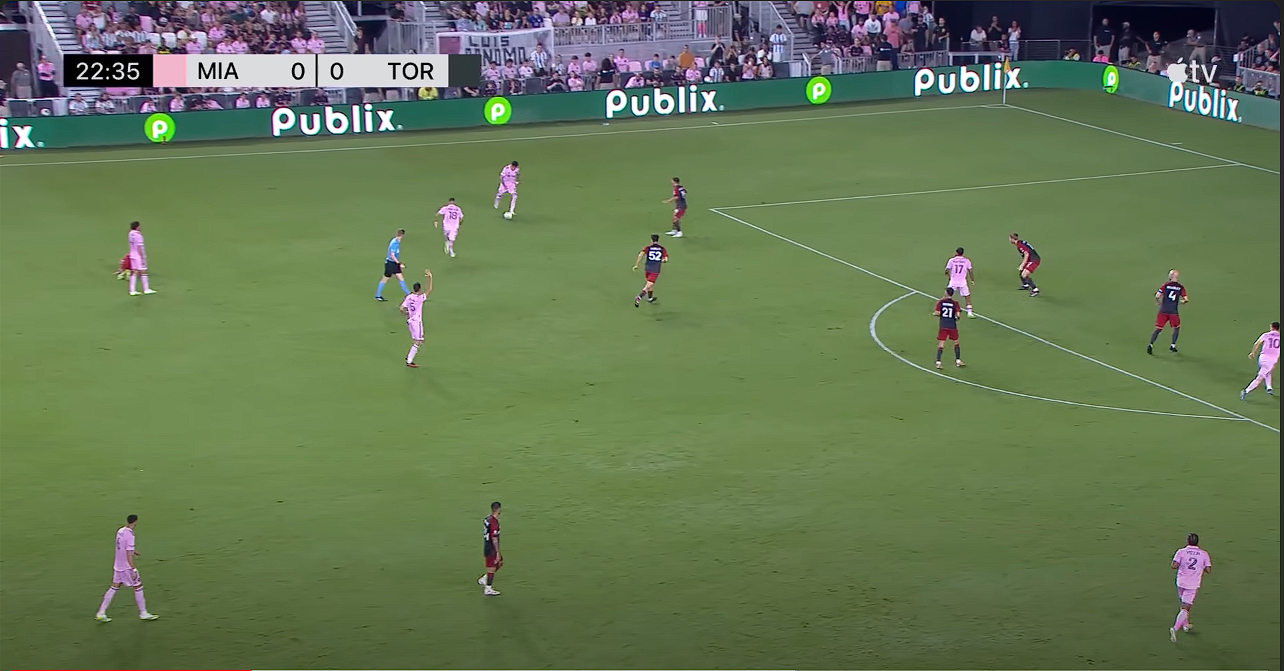

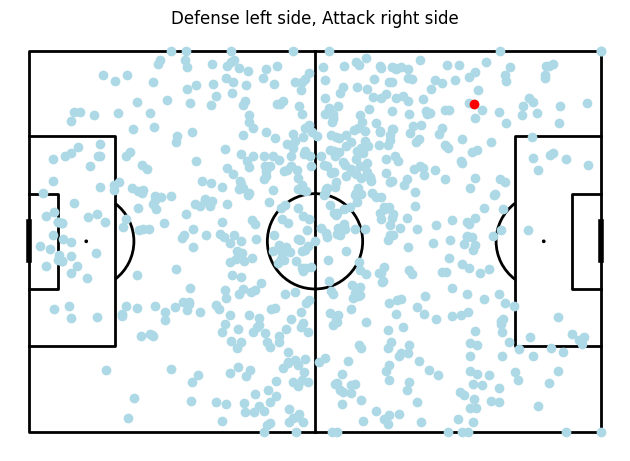

In [21]:
# Create a Pitch object using the 'statbomb' style
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black')

# Create the figure and axis
fig, ax = pitch.draw()

# Plot the locations
pitch.scatter(df['x_coord'], df['y_coord'], color='lightblue', ax=ax)

# Mark specific location in red
specific_location = [93.3, 11.2]
pitch.scatter(specific_location[0], specific_location[1], color='red', ax=ax)

# Title
plt.title('Defense left side, Attack right side')

# Show the plot
plt.show()


**Exploratory Data Analysis(EDA)**

In [22]:
# Filter the DataFrame for passes before the 45th minute
passes_before_45 = df[df['minute'] < 45]

# Calculate the pass count
pass_count_before_45 = passes_before_45.shape[0]

print("Pass count before minute 45:", pass_count_before_45)


Pass count before minute 45: 261


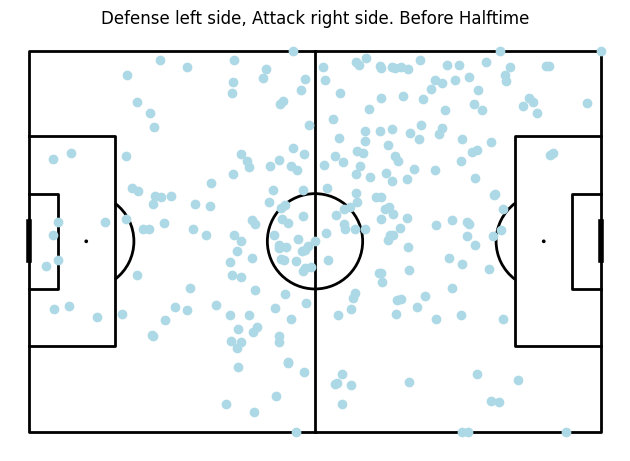

In [23]:
# Filter the DataFrame where the minute column is less than 45
filtered_df1 = df[df['minute'] < 45].copy()

# Create a Pitch object using the 'statbomb' style
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black')

# Create the figure and axis
fig, ax = pitch.draw()

# Plot the locations
pitch.scatter(filtered_df1['x_coord'], filtered_df1['y_coord'], color='lightblue', ax=ax)

# Title
plt.title('Defense left side, Attack right side. Before Halftime')

# Show the plot
plt.show()


In [24]:
# Filter the DataFrame for passes after the 45th minute
passes_after_45 = df[(df['minute'] > 45)]

# Calculate the pass count
pass_count_after_45 = passes_after_45.shape[0]

print("Pass count after minute 45:", pass_count_after_45)


Pass count after minute 45: 455


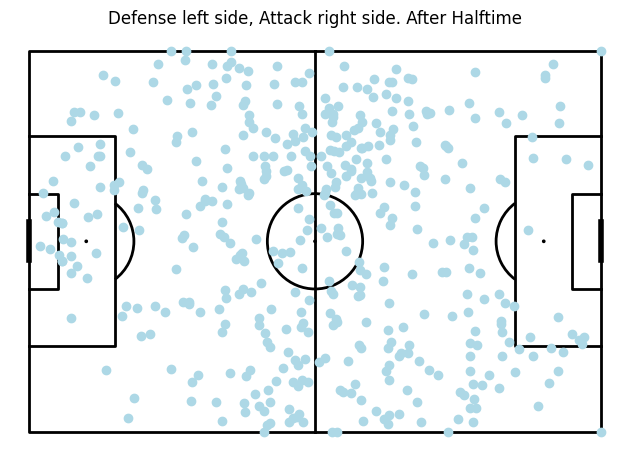

In [25]:
# Filter the DataFrame where the minute column is greater than 45
filtered_df2 = df[df['minute'] > 45].copy()

# Create a Pitch object using the 'statbomb' style
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black')

# Create the figure and axis
fig, ax = pitch.draw()

# Plot the locations
pitch.scatter(filtered_df2['x_coord'], filtered_df2['y_coord'], color='lightblue', ax=ax)

# Title
plt.title('Defense left side, Attack right side. After Halftime')

# Show the plot
plt.show()


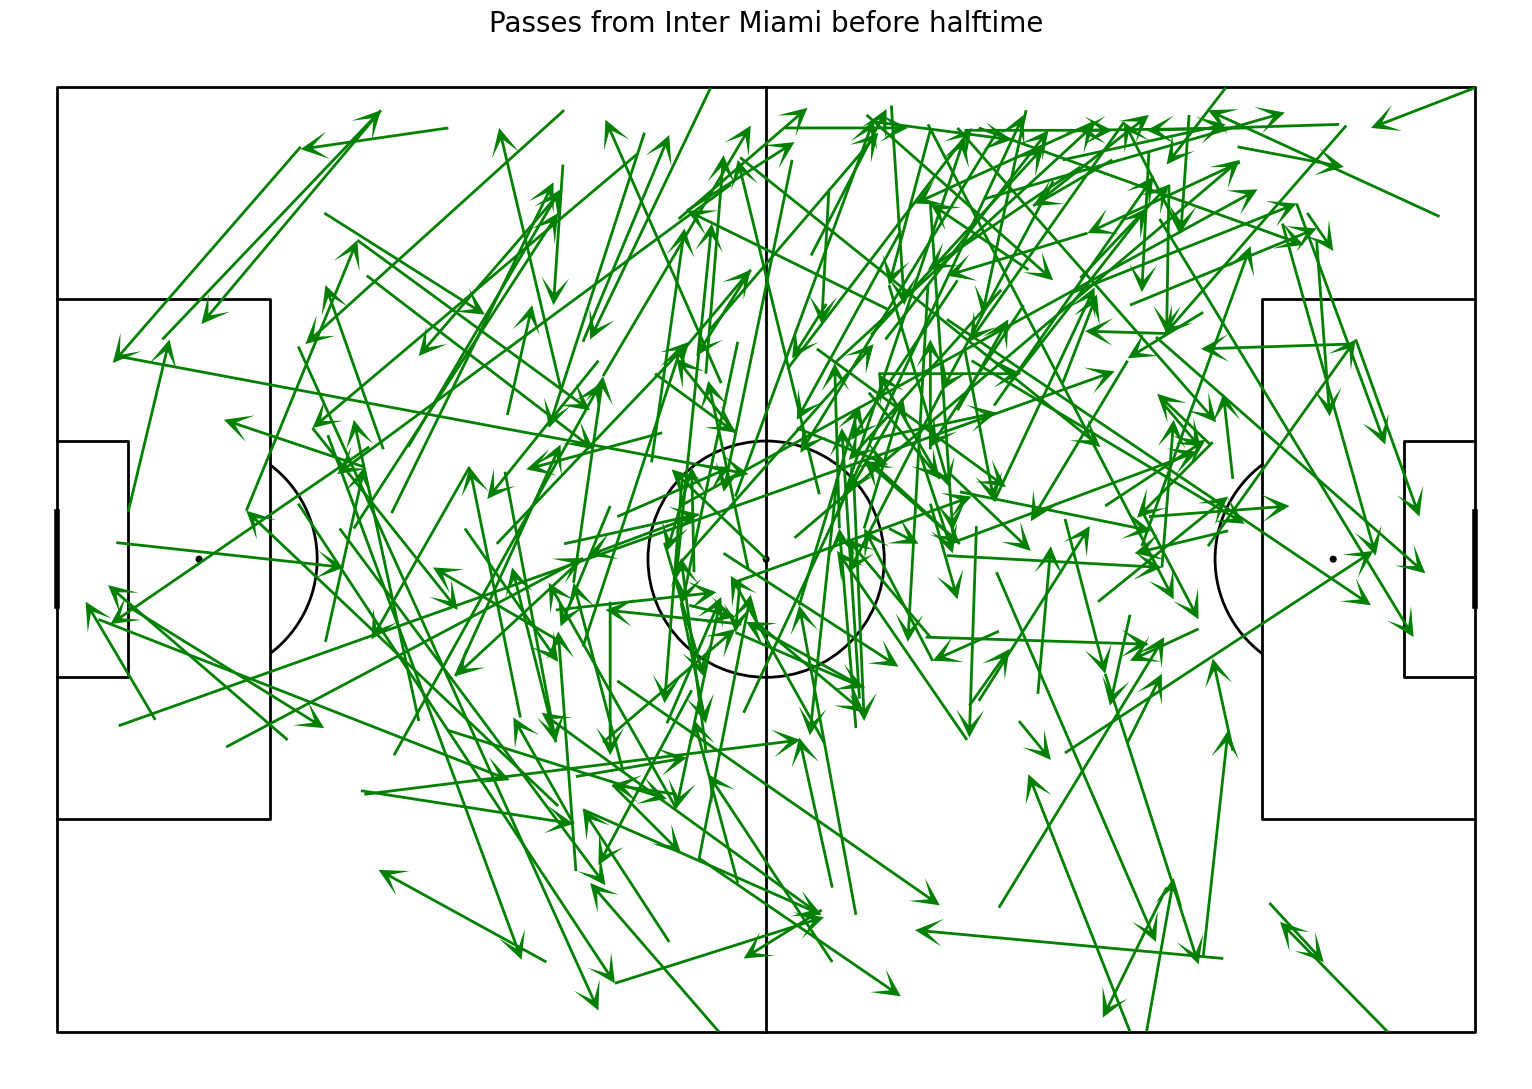

In [26]:
filtered_df_before = df[(df['minute'] < 45)].copy()
# Create a Pitch object
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black')

# Create the figure and axis
fig, ax = pitch.draw(figsize=(16, 11))

# Plot the passes as arrows
pitch.arrows(filtered_df_before['x_coord'], filtered_df_before['y_coord'],
             filtered_df_before['end_location_x'], filtered_df_before['end_location_y'],
             width=2, headwidth=10, headlength=10, color='green', ax=ax, label='completed passes')


# Set the title
ax.set_title('Passes from Inter Miami before halftime', fontsize=20)

plt.show()


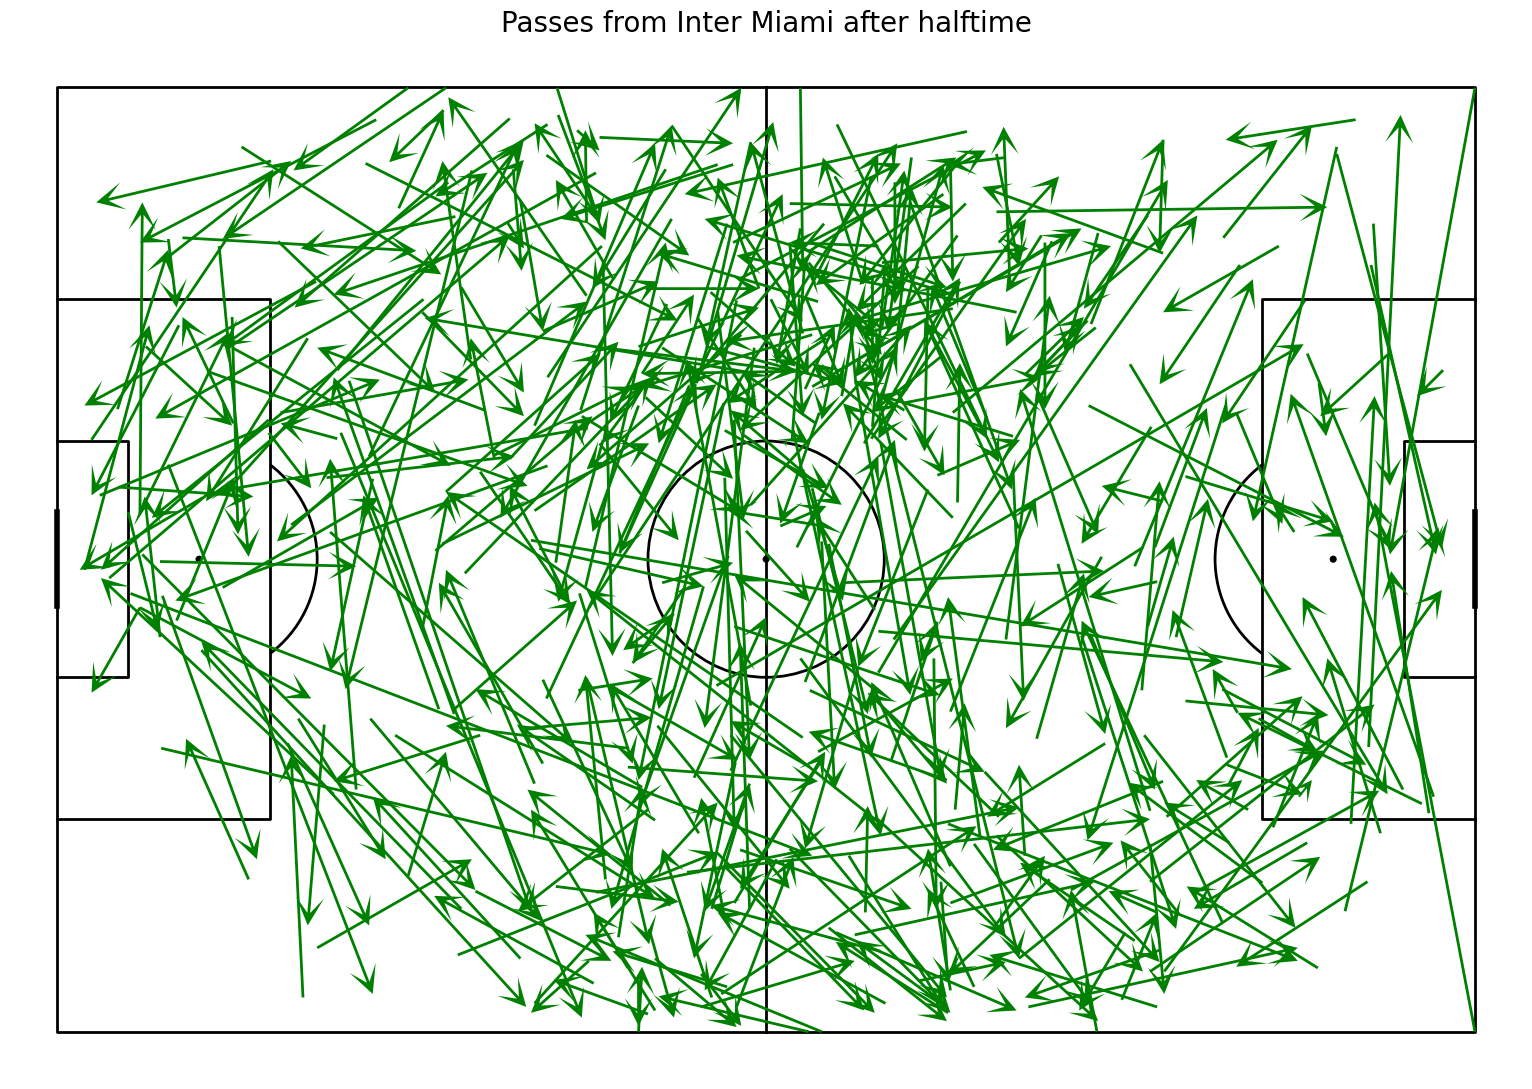

In [27]:
# Filter the DataFrame for passes after halftime
filtered_df_after = df[df['minute'] >= 45].copy()

# Create a Pitch object
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black')

# Create the figure and axis
fig, ax = pitch.draw(figsize=(16, 11))

# Plot the passes as arrows
pitch.arrows(filtered_df_after['x_coord'], filtered_df_after['y_coord'],
             filtered_df_after['end_location_x'], filtered_df_after['end_location_y'],
             width=2, headwidth=10, headlength=10, color='green', ax=ax, label='completed passes')



# Set the title
ax.set_title('Passes from Inter Miami after halftime', fontsize=20)

plt.show()

In [28]:
df['pass'].head()

0    {'recipient': {'id': 5203, 'name': 'Sergio Bus...
1    {'recipient': {'id': 225210, 'name': 'David Ru...
2    {'recipient': {'id': 366752, 'name': 'Tomás Ag...
3    {'recipient': {'id': 18618, 'name': 'Serhiy Kr...
4    {'recipient': {'id': 23828, 'name': 'Kamal Mil...
Name: pass, dtype: object

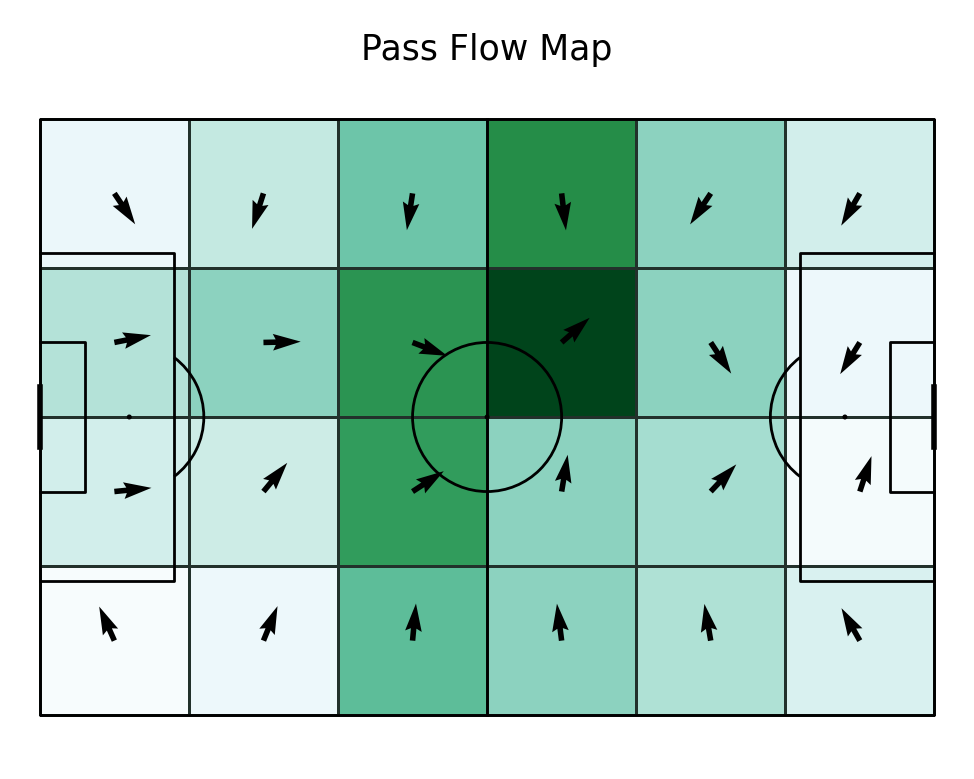

In [29]:
# Select relevant columns from the DataFrame
df_pass = df[['x_coord', 'y_coord', 'end_location_x', 'end_location_y']]

# Define pitch parameters
pitch = Pitch(pitch_type='statsbomb', line_zorder=2, line_color='black', pitch_color='white')
bins = (6, 4)

# Plotting
fig, axs = pitch.grid(figheight=8, endnote_height=0.03, endnote_space=0,
                      title_height=0.1, title_space=0, grid_height=0.82,
                      axis=False)
fig.set_facecolor('white')

# Plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(df_pass.x_coord, df_pass.y_coord, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=axs['pitch'], cmap='BuGn', edgecolors='#22312b')

# Plot the pass flow map with a single color ('black') and length of the arrow (5)
fm = pitch.flow(df_pass.x_coord, df_pass.y_coord, df_pass.end_location_x, df_pass.end_location_y,
                color='black', arrow_type='same', arrow_length=5, bins=bins, ax=axs['pitch'], zorder=3)

# Title / Endnote
axs['title'].text(0.5, 0.5, 'Pass Flow Map',
                  fontsize=25, va='center', ha='center', color='black')

plt.show()


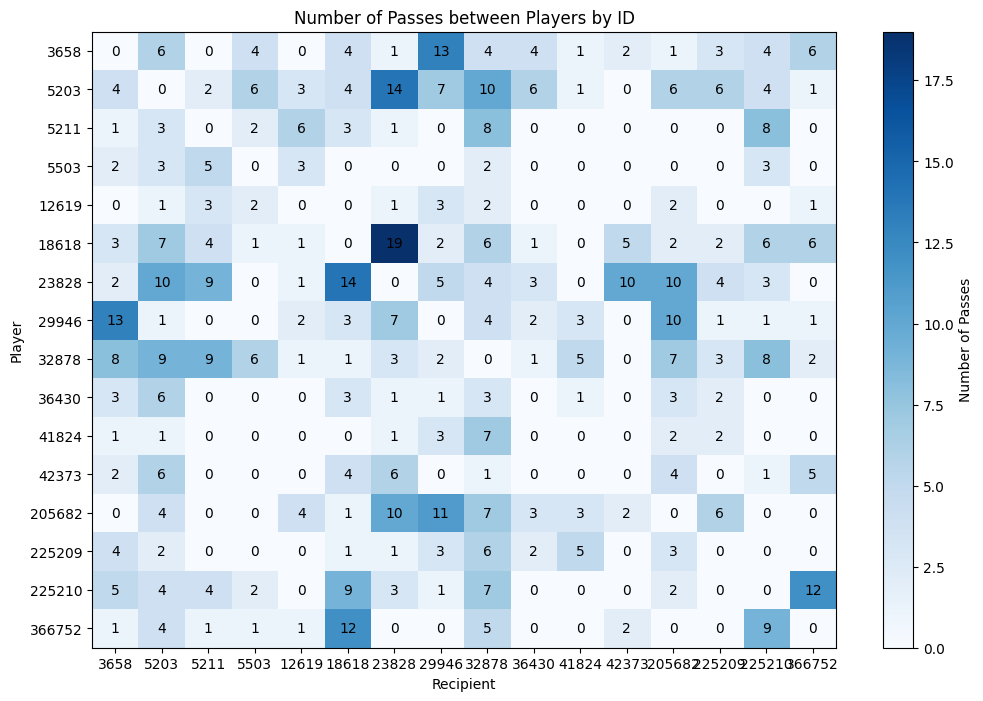

In [30]:
# Create a pivot table to count the number of passes between players
pass_counts = df.pivot_table(index='player_id', columns='recipient', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
heatmap = plt.imshow(pass_counts.values, cmap='Blues', aspect='auto')

# Add numbers inside each cell
for i in range(len(pass_counts.index)):
    for j in range(len(pass_counts.columns)):
        plt.text(j, i, pass_counts.values[i, j], ha='center', va='center', color='black')

plt.colorbar(heatmap, label='Number of Passes')
plt.title('Number of Passes between Players by ID')
plt.xlabel('Recipient')
plt.ylabel('Player')
plt.xticks(ticks=range(len(pass_counts.columns)), labels=pass_counts.columns)
plt.yticks(ticks=range(len(pass_counts.index)), labels=pass_counts.index)
plt.show()


In [31]:
# Filter pass_counts to include only pairs with 8 or more passes
high_pass_counts = pass_counts[pass_counts >= 8]

# Iterate over the index and column names of high_pass_counts
for player_id, recipient_id in high_pass_counts.stack().index:
    player_name = df.loc[df['player_id'] == player_id, 'player'].iloc[0]
    recipient_name = df.loc[df['player_id'] == recipient_id, 'player'].iloc[0]
    pass_count = high_pass_counts.loc[player_id, recipient_id]
    print(f"{player_name} -> {recipient_name}: {pass_count} passes")


DeAndre Yedlin -> Robert Taylor: 13.0 passes
Sergio Busquets i Burgos -> Kamal Miller: 14.0 passes
Sergio Busquets i Burgos -> Facundo Farías: 10.0 passes
Jordi Alba Ramos -> Facundo Farías: 8.0 passes
Jordi Alba Ramos -> David Ruiz: 8.0 passes
Serhiy Kryvtsov -> Kamal Miller: 19.0 passes
Kamal Miller -> Sergio Busquets i Burgos: 10.0 passes
Kamal Miller -> Jordi Alba Ramos: 9.0 passes
Kamal Miller -> Serhiy Kryvtsov: 14.0 passes
Kamal Miller -> Drake Callender: 10.0 passes
Kamal Miller -> Noah Allen: 10.0 passes
Robert Taylor -> DeAndre Yedlin: 13.0 passes
Robert Taylor -> Noah Allen: 10.0 passes
Facundo Farías -> DeAndre Yedlin: 8.0 passes
Facundo Farías -> Sergio Busquets i Burgos: 9.0 passes
Facundo Farías -> Jordi Alba Ramos: 9.0 passes
Facundo Farías -> David Ruiz: 8.0 passes
Noah Allen -> Kamal Miller: 10.0 passes
Noah Allen -> Robert Taylor: 11.0 passes
David Ruiz -> Serhiy Kryvtsov: 9.0 passes
David Ruiz -> Tomás Agustín Avilés Mancilla: 12.0 passes
Tomás Agustín Avilés Mancil

In [32]:
# Create an empty list to store the pairs, their player IDs, and pass counts
pair_pass_counts = []

# Iterate over the upper triangular part of the pass_counts matrix
for i in range(len(pass_counts.columns)):
    for j in range(i + 1, len(pass_counts.columns)):
        player_id = pass_counts.columns[i]
        recipient_id = pass_counts.columns[j]

        # Get pass counts for both directions
        pass_count_forward = pass_counts.loc[player_id, recipient_id]
        pass_count_backward = pass_counts.loc[recipient_id, player_id]
        total_pass_count = pass_count_forward + pass_count_backward

        # Append the pair, their player IDs, and pass count to the list
        pair_pass_counts.append(((player_id, recipient_id), (pass_count_forward, pass_count_backward), total_pass_count))

# Sort the list of pairs by pass count in descending order
sorted_pairs = sorted(pair_pass_counts, key=lambda x: x[2], reverse=True)

# Print the sorted pairs
for (player_id, recipient_id), (pass_count_forward, pass_count_backward), total_pass_count in sorted_pairs:
    player_name = df.loc[df['player_id'] == player_id, 'player'].iloc[0]
    recipient_name = df.loc[df['player_id'] == recipient_id, 'player'].iloc[0]
    print(f"{player_name} (ID: {player_id}) <-> {recipient_name} (ID: {recipient_id}): {total_pass_count} passes")


Serhiy Kryvtsov (ID: 18618) <-> Kamal Miller (ID: 23828): 33 passes
DeAndre Yedlin (ID: 3658) <-> Robert Taylor (ID: 29946): 26 passes
Sergio Busquets i Burgos (ID: 5203) <-> Kamal Miller (ID: 23828): 24 passes
Robert Taylor (ID: 29946) <-> Noah Allen (ID: 205682): 21 passes
David Ruiz (ID: 225210) <-> Tomás Agustín Avilés Mancilla (ID: 366752): 21 passes
Kamal Miller (ID: 23828) <-> Noah Allen (ID: 205682): 20 passes
Sergio Busquets i Burgos (ID: 5203) <-> Facundo Farías (ID: 32878): 19 passes
Serhiy Kryvtsov (ID: 18618) <-> Tomás Agustín Avilés Mancilla (ID: 366752): 18 passes
Jordi Alba Ramos (ID: 5211) <-> Facundo Farías (ID: 32878): 17 passes
Kamal Miller (ID: 23828) <-> Drake Callender (ID: 42373): 16 passes
Serhiy Kryvtsov (ID: 18618) <-> David Ruiz (ID: 225210): 15 passes
Facundo Farías (ID: 32878) <-> David Ruiz (ID: 225210): 15 passes
Facundo Farías (ID: 32878) <-> Noah Allen (ID: 205682): 14 passes
DeAndre Yedlin (ID: 3658) <-> Facundo Farías (ID: 32878): 12 passes
Sergio Bu

In [33]:
# Calculate average positions of players
average_positions = df.groupby('player_id').agg({'x_coord': 'mean', 'y_coord': 'mean', 'player': 'first'}).reset_index()

# Define colormap
cmap = plt.cm.get_cmap('autumn')

# Define pass count range
pass_count_range = [pair[2] for pair in sorted_pairs]
pass_count_min = min(pass_count_range)
pass_count_max = max(pass_count_range)

# Initialize Plotly figure
fig = go.Figure()

# Add nodes for players
for index, row in average_positions.iterrows():
    fig.add_trace(go.Scatter(x=[row['x_coord']], 
                             y=[row['y_coord']],
                             mode='markers',
                             marker=dict(color='white', size=20),
                             text=row['player'],
                             hoverinfo='text'))

# Add edges for passes between players
for (player_id, recipient_id), (pass_count_forward, pass_count_backward), total_pass_count in sorted_pairs:
    player_position = average_positions.loc[average_positions['player_id'] == player_id]
    recipient_position = average_positions.loc[average_positions['player_id'] == recipient_id]
    
    # Normalize pass count to [0, 1] for colormap
    normalized_pass_count = (total_pass_count - pass_count_min) / (pass_count_max - pass_count_min)
    
    # Define color based on pass count
    color = f'rgba({int(cmap(normalized_pass_count)[0]*255)}, {int(cmap(normalized_pass_count)[1]*255)}, {int(cmap(normalized_pass_count)[2]*255)}, 0.7)'
    
    # Define line width based on pass count
    line_width = 1 + normalized_pass_count * 15 
    
    # Add an edge between player and recipient
    fig.add_trace(go.Scatter(x=[player_position['x_coord'].iloc[0], recipient_position['x_coord'].iloc[0]],
                             y=[player_position['y_coord'].iloc[0], recipient_position['y_coord'].iloc[0]],
                             mode='lines',
                             line=dict(color=color, width=line_width),
                             hoverinfo='none'))  # Remove hover info for the pass lines

# Update layout with dark background color and reversed y-axis to match with the actual pitch view
fig.update_layout(title='Pass Network between Players', plot_bgcolor='#22312b', paper_bgcolor='#22312b', font=dict(color='white'), yaxis=dict(autorange='reversed'))

# Show the plot
fig.show()


C:\Users\Nayeem\AppData\Local\Temp\ipykernel_37860\3439383495.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('autumn')


In [34]:
# Slice the sorted pairs list to get the top 10 pairs
top_10_pairs = sorted_pairs[:10]

# Print the top 10 pairs
for (player_id, recipient_id), (pass_count_forward, pass_count_backward), total_pass_count in top_10_pairs:
    player_name = df.loc[df['player_id'] == player_id, 'player'].iloc[0]
    recipient_name = df.loc[df['player_id'] == recipient_id, 'player'].iloc[0]
    print(f"{player_name} (ID: {player_id}) <-> {recipient_name} (ID: {recipient_id}): {total_pass_count} passes")


Serhiy Kryvtsov (ID: 18618) <-> Kamal Miller (ID: 23828): 33 passes
DeAndre Yedlin (ID: 3658) <-> Robert Taylor (ID: 29946): 26 passes
Sergio Busquets i Burgos (ID: 5203) <-> Kamal Miller (ID: 23828): 24 passes
Robert Taylor (ID: 29946) <-> Noah Allen (ID: 205682): 21 passes
David Ruiz (ID: 225210) <-> Tomás Agustín Avilés Mancilla (ID: 366752): 21 passes
Kamal Miller (ID: 23828) <-> Noah Allen (ID: 205682): 20 passes
Sergio Busquets i Burgos (ID: 5203) <-> Facundo Farías (ID: 32878): 19 passes
Serhiy Kryvtsov (ID: 18618) <-> Tomás Agustín Avilés Mancilla (ID: 366752): 18 passes
Jordi Alba Ramos (ID: 5211) <-> Facundo Farías (ID: 32878): 17 passes
Kamal Miller (ID: 23828) <-> Drake Callender (ID: 42373): 16 passes


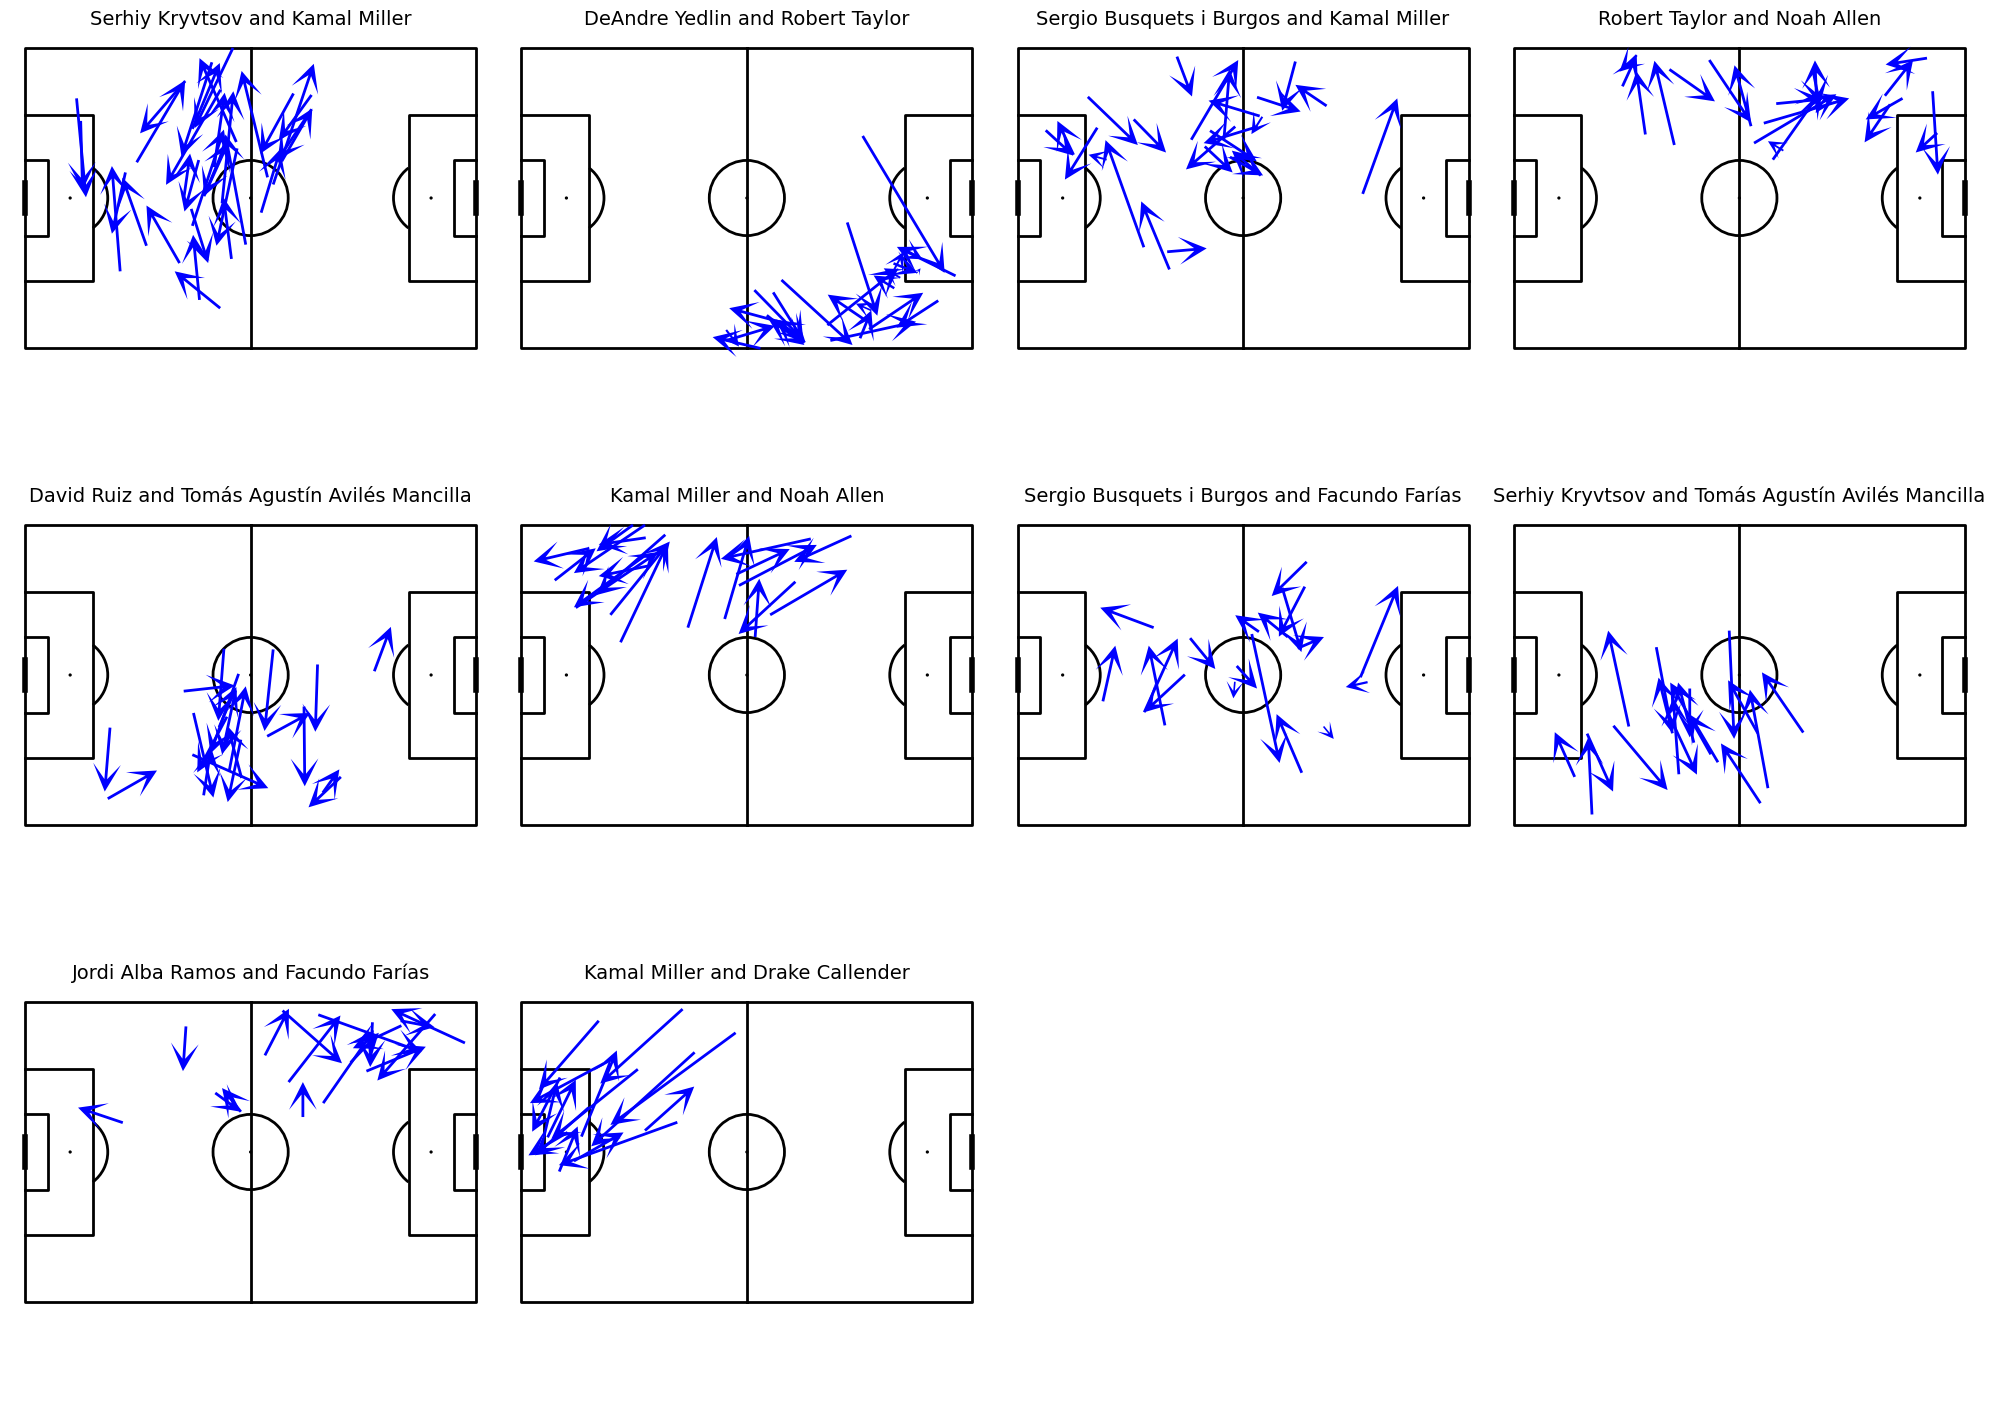

In [35]:
def plot_passes_between_players(ax, df, player1_id, player2_id, team_id, title):
    filtered_df = df[((df['player_id'] == player1_id) & (df['recipient'] == player2_id) | 
                      (df['player_id'] == player2_id) & (df['recipient'] == player1_id)) & 
                     (df['team_id'] == team_id)].copy()

    # Create a Pitch object
    pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black')

    # Plot the passes as arrows
    pitch.arrows(filtered_df['x_coord'], filtered_df['y_coord'],
                 filtered_df['end_location_x'], filtered_df['end_location_y'],
                 width=2, headwidth=10, headlength=10, color='blue', ax=ax, label=f'{player1_id} and {player2_id}')

    # Set the title
    ax.set_title(title, fontsize=14)
    
# Define pairs and their pass counts
pairs_pass_counts = {
    ("Serhiy Kryvtsov", "Kamal Miller"): (18618, 23828),
    ("DeAndre Yedlin", "Robert Taylor"): (3658, 29946),
    ("Sergio Busquets i Burgos", "Kamal Miller"): (5203, 23828),
    ("Robert Taylor", "Noah Allen"): (29946, 205682),
    ("David Ruiz", "Tomás Agustín Avilés Mancilla"): (225210, 366752),
    ("Kamal Miller", "Noah Allen"): (23828, 205682),
    ("Sergio Busquets i Burgos", "Facundo Farías"): (5203, 32878),
    ("Serhiy Kryvtsov", "Tomás Agustín Avilés Mancilla"): (18618, 366752),
    ("Jordi Alba Ramos", "Facundo Farías"): (5211, 32878),
    ("Kamal Miller", "Drake Callender"): (23828, 42373)
}

# Create a figure and axes for subplots
fig, axs = plt.subplots(3, 4, figsize=(20, 15))

# Create a Pitch object for plotting
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black')

# Plot passes between all pairs
for i, ((player1, player2), (player1_id, player2_id)) in enumerate(pairs_pass_counts.items()):
    if i >= axs.size:  # Check if we exceed the number of subplots
        break
    plot_passes_between_players(axs[i//4, i%4], df, player1_id, player2_id, 1975, f'{player1} and {player2}')
    pitch.draw(ax=axs[i//4, i%4])

# Hide remaining subplots
for j in range(i+1, axs.size):
    axs.flatten()[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


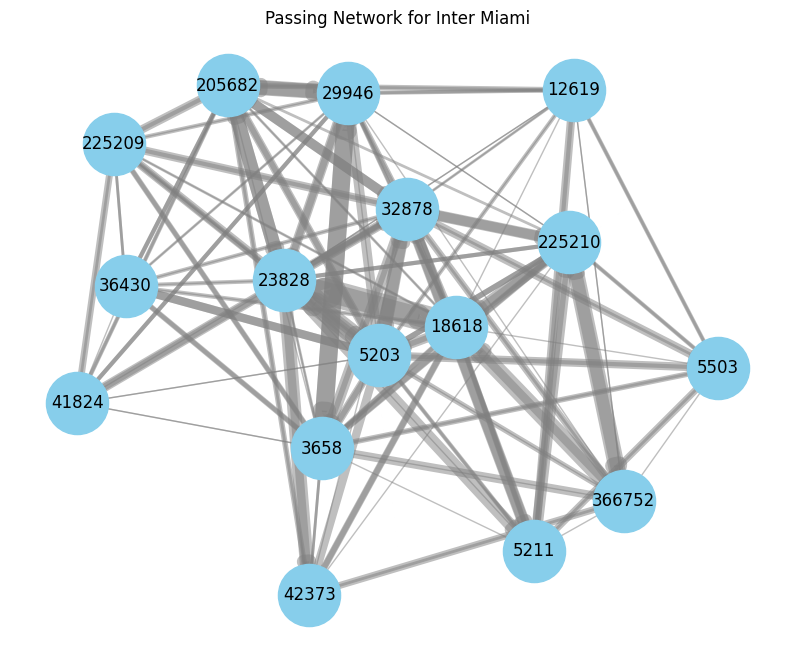

Key Players: [5203, 32878, 18618, 3658, 23828]
Most Frequent Passing Combination: (18618, 23828)


In [36]:
# Filter out rows with 'NA' player_id or recipient
df_filtered = df[(df['player_id'] != 'NA') & (df['recipient'] != 'NA')]

# Calculate passing matrix
passing_matrix = df_filtered.groupby(['player_id', 'recipient']).size().unstack(fill_value=0)

# Create passing network graph
G = nx.from_pandas_edgelist(df_filtered, 'player_id', 'recipient', create_using=nx.DiGraph())

# Define edge widths based on the number of passes
edge_widths = [passing_matrix.loc[edge[0], edge[1]] for edge in G.edges()]

# Visualize passing network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
plt.title('Passing Network for Inter Miami')
plt.axis('off')
plt.show()

# Identify key players
centrality = nx.degree_centrality(G)
key_players = sorted(centrality, key=centrality.get, reverse=True)[:5]  # Top 5 players by degree centrality
print("Key Players:", key_players)

# Recurring passing combinations
passing_combinations = passing_matrix.stack().idxmax()  # Most frequent passing combination
print("Most Frequent Passing Combination:", passing_combinations)


In [37]:
# Identify players with their degree centrality
players_with_degree = [(player, centrality[player]) for player in centrality]

# Sort players by degree centrality in descending order
sorted_players_with_degree = sorted(players_with_degree, key=lambda x: x[1], reverse=True)

# Print the player IDs and their degree centrality values for all players
print("All Players and Their Degree Centrality:")
for player_id, degree_centrality in sorted_players_with_degree:
    player_name = df[df['player_id'] == player_id]['player'].iloc[0]  # Get player name
    print(f"Player: {player_name} (ID: {player_id}), Degree Centrality: {degree_centrality}")


All Players and Their Degree Centrality:
Player: Sergio Busquets i Burgos (ID: 5203), Degree Centrality: 1.9333333333333333
Player: Facundo Farías (ID: 32878), Degree Centrality: 1.9333333333333333
Player: Serhiy Kryvtsov (ID: 18618), Degree Centrality: 1.7333333333333334
Player: DeAndre Yedlin (ID: 3658), Degree Centrality: 1.7333333333333334
Player: Kamal Miller (ID: 23828), Degree Centrality: 1.6666666666666667
Player: Robert Taylor (ID: 29946), Degree Centrality: 1.5333333333333332
Player: Noah Allen (ID: 205682), Degree Centrality: 1.4666666666666666
Player: David Ruiz (ID: 225210), Degree Centrality: 1.3333333333333333
Player: Benjamin Cremaschi (ID: 225209), Degree Centrality: 1.2
Player: Josef Alexander Martínez Mencia (ID: 12619), Degree Centrality: 1.1333333333333333
Player: Tomás Agustín Avilés Mancilla (ID: 366752), Degree Centrality: 1.1333333333333333
Player: Dixon Jair Arroyo Espinoza (ID: 36430), Degree Centrality: 1.1333333333333333
Player: Jordi Alba Ramos (ID: 5211),

In [38]:
pass_counts

recipient  3658    5203    5211    5503    12619   18618   23828   29946   \
player_id                                                                   
3658            0       6       0       4       0       4       1      13   
5203            4       0       2       6       3       4      14       7   
5211            1       3       0       2       6       3       1       0   
5503            2       3       5       0       3       0       0       0   
12619           0       1       3       2       0       0       1       3   
18618           3       7       4       1       1       0      19       2   
23828           2      10       9       0       1      14       0       5   
29946          13       1       0       0       2       3       7       0   
32878           8       9       9       6       1       1       3       2   
36430           3       6       0       0       0       3       1       1   
41824           1       1       0       0       0       0       1       3   
42373           2       6       0       0       0       4       6       0   
205682          0       4       0       0       4       1      10      11   
225209          4       2       0       0       0       1       1       3   
225210          5       4       4       2       0       9       3       1   
366752          1       4       1       1       1      12       0       0   

recipient  32878   36430   41824   42373   205682  225209  225210  366752  
player_id                                                                  
3658            4       4       1       2       1       3       4       6  
5203           10       6       1       0       6       6       4       1  
5211            8       0       0       0       0       0       8       0  
5503            2       0       0       0       0       0       3       0  
12619           2       0       0       0       2       0       0       1  
18618           6       1       0       5       2       2       6       6  
23828           4       3       0      10      10       4       3       0  
29946           4       2       3       0      10       1       1       1  
32878           0       1       5       0       7       3       8       2  
36430           3       0       1       0       3       2       0       0  
41824           7       0       0       0       2       2       0       0  
42373           1       0       0       0       4       0       1       5  
205682          7       3       3       2       0       6       0       0  
225209          6       2       5       0       3       0       0       0  
225210          7       0       0       0       2       0       0      12  
366752          5       0       0       2       0       0       9       0

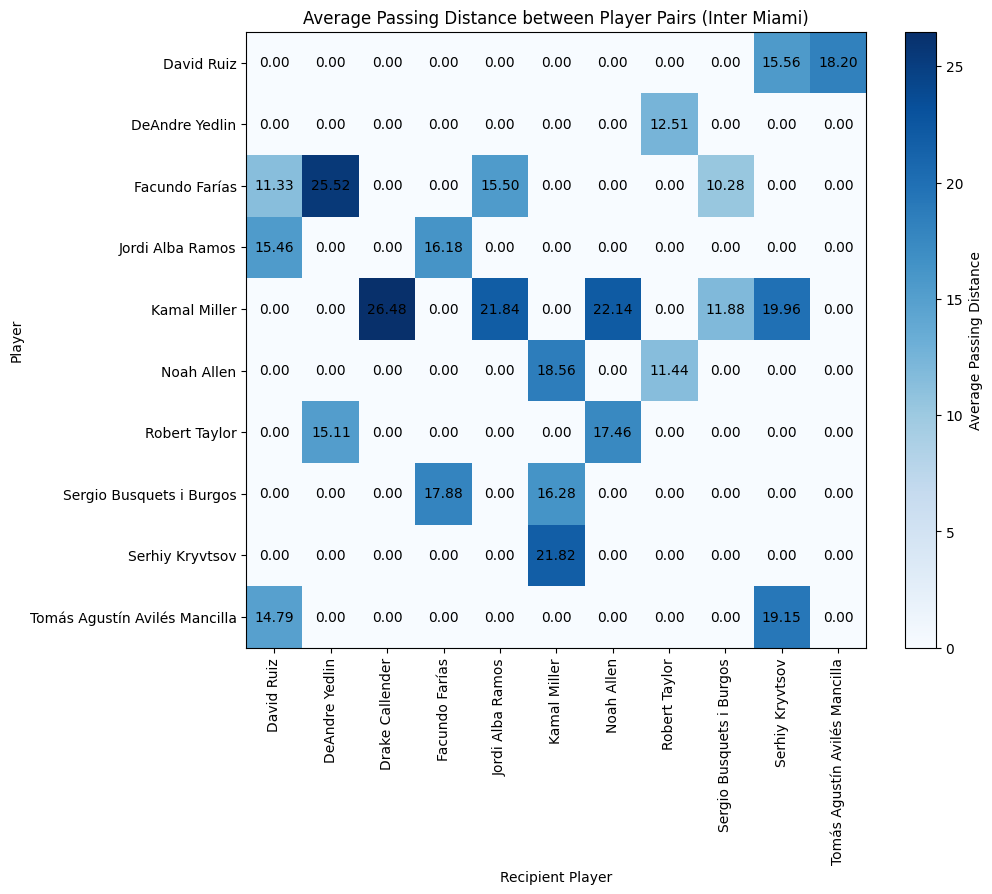

In [39]:
# Filter DataFrame based on team_id (Inter Miami)
inter_miami_passes = df

# Calculate passing distance for each pass
inter_miami_passes['passing_distance'] = np.sqrt((inter_miami_passes['end_location_x'] - inter_miami_passes['x_coord'])**2 + 
                                                 (inter_miami_passes['end_location_y'] - inter_miami_passes['y_coord'])**2)

# Count passes in both directions between player pairs
pass_counts = inter_miami_passes.groupby(['player_id', 'recipient']).size().reset_index(name='pass_count')
pass_counts_reverse = inter_miami_passes.groupby(['recipient', 'player_id']).size().reset_index(name='pass_count_reverse')

# Merge pass counts from both directions
pass_counts_merged = pd.merge(pass_counts, pass_counts_reverse, how='outer', on=['player_id', 'recipient'])

# Combine pass counts from both directions
pass_counts_merged['total_pass_count'] = pass_counts_merged['pass_count'].fillna(0) + pass_counts_merged['pass_count_reverse'].fillna(0)

# Filter pairs with at least 15 passes in total
pass_counts_filtered = pass_counts_merged[pass_counts_merged['total_pass_count'] >= 15]

# Merge filtered pass counts back to the DataFrame
inter_miami_passes_filtered = pd.merge(pass_counts_filtered, inter_miami_passes, on=['player_id', 'recipient'], how='inner')

# Merge with player names
inter_miami_passes_filtered = pd.merge(inter_miami_passes_filtered, df[['player_id', 'player']], left_on='player_id', right_on='player_id', suffixes=('', '_player'))
inter_miami_passes_filtered = pd.merge(inter_miami_passes_filtered, df[['player_id', 'player']], left_on='recipient', right_on='player_id', suffixes=('', '_recipient'))

# Calculate average passing distance for each player pair
average_passing_distance_between_pairs = inter_miami_passes_filtered.groupby(['player', 'player_recipient'])['passing_distance'].mean().reset_index()

# Rename columns for better interpretation
average_passing_distance_between_pairs.rename(columns={'passing_distance': 'average_passing_distance'}, inplace=True)

# Pivot the DataFrame to create a matrix of average passing distances between players
passing_distance_matrix = (average_passing_distance_between_pairs.pivot(index='player', columns='player_recipient', values='average_passing_distance')
                                                                .fillna(0))  # Fill NaN values with 0 for players who haven't passed to each other

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(passing_distance_matrix, cmap='Blues', aspect='auto')

# Add numbers to each cell
for i in range(len(passing_distance_matrix.index)):
    for j in range(len(passing_distance_matrix.columns)):
        plt.text(j, i, '{:.2f}'.format(passing_distance_matrix.values[i, j]), ha='center', va='center', color='black')

plt.colorbar(label='Average Passing Distance')
plt.title('Average Passing Distance between Player Pairs (Inter Miami)')
plt.xlabel('Recipient Player')
plt.ylabel('Player')
plt.xticks(ticks=range(len(passing_distance_matrix.columns)), labels=passing_distance_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(passing_distance_matrix.index)), labels=passing_distance_matrix.index)
plt.show()


In [40]:
# Sort the DataFrame by 'average_passing_distance' in descending order
sorted_average_passing_distance = average_passing_distance_between_pairs.sort_values(by='average_passing_distance', ascending=False)

# Display the sorted DataFrame
sorted_average_passing_distance


player               player_recipient  \
9                    Kamal Miller                Drake Callender   
4                  Facundo Farías                 DeAndre Yedlin   
11                   Kamal Miller                     Noah Allen   
10                   Kamal Miller               Jordi Alba Ramos   
20                Serhiy Kryvtsov                   Kamal Miller   
13                   Kamal Miller                Serhiy Kryvtsov   
22  Tomás Agustín Avilés Mancilla                Serhiy Kryvtsov   
14                     Noah Allen                   Kamal Miller   
1                      David Ruiz  Tomás Agustín Avilés Mancilla   
18       Sergio Busquets i Burgos                 Facundo Farías   
17                  Robert Taylor                     Noah Allen   
19       Sergio Busquets i Burgos                   Kamal Miller   
8                Jordi Alba Ramos                 Facundo Farías   
0                      David Ruiz                Serhiy Kryvtsov   
5                  Facundo Farías               Jordi Alba Ramos   
7                Jordi Alba Ramos                     David Ruiz   
16                  Robert Taylor                 DeAndre Yedlin   
21  Tomás Agustín Avilés Mancilla                     David Ruiz   
2                  DeAndre Yedlin                  Robert Taylor   
12                   Kamal Miller       Sergio Busquets i Burgos   
15                     Noah Allen                  Robert Taylor   
3                  Facundo Farías                     David Ruiz   
6                  Facundo Farías       Sergio Busquets i Burgos   

    average_passing_distance  
9                  26.482263  
4                  25.516114  
11                 22.137349  
10                 21.835597  
20                 21.815811  
13                 19.957394  
22                 19.145897  
14                 18.555359  
1                  18.198167  
18                 17.879226  
17                 17.463426  
19                 16.281917  
8                  16.183522  
0                  15.557288  
5                  15.497315  
7                  15.460662  
16                 15.113126  
21                 14.794197  
2                  12.511680  
12                 11.883653  
15                 11.438703  
3                  11.326841  
6                  10.275891

Heatmap based on pass received location

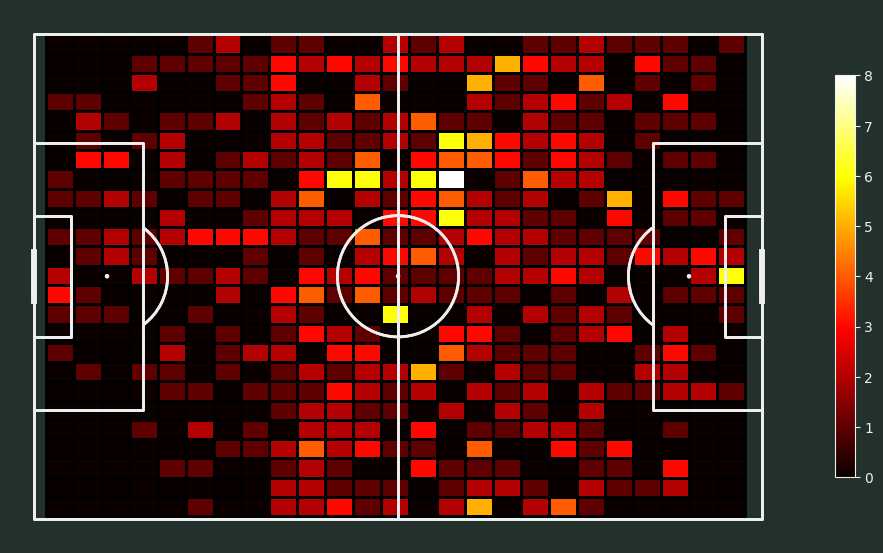

In [41]:
# Extracting end location coordinates
end_location_x = df['end_location_x']
end_location_y = df['end_location_y']

# Initialize pitch object
pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#22312b', line_color='#efefef')

# Create a figure and axis
fig, ax = pitch.draw(figsize=(10, 7))
fig.set_facecolor('#22312b')

# Plot the heatmap using plt.hist2d() with black edge colors
heatmap = ax.hist2d(end_location_x, end_location_y, bins=25, cmap='hot', edgecolor='black')

# Overlay pitch lines
pitch.draw(ax=ax)

# Add colorbar
cbar = fig.colorbar(heatmap[3], ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')


plt.show()

Player Average position plotted along with the heatmap

In [42]:
# Extracting end location coordinates
end_location_x = df['end_location_x']
end_location_y = df['end_location_y']

# Reverse the y-coordinates
max_y = end_location_y.max()
end_location_y_reverse = max_y - end_location_y

# Group by player_id and compute the mean of x and reversed y coordinates
average_positions = df.groupby('player_id')[['x_coord', 'y_coord']].mean()
average_positions['y_coord'] = max_y - average_positions['y_coord']

# Get player names
player_names = df.groupby('player_id')['player'].first()

# Initialize pitch object
pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='#7fcdbb', line_color='#2c7fb8')

# Create a figure
fig = go.Figure()

# Plot the heatmap using go.Histogram2dContour
heatmap = go.Histogram2dContour(
    x=end_location_x,
    y=end_location_y_reverse,
    colorscale='YlOrRd',  # Better color combination
    contours=dict(coloring='fill'),
    hoverinfo='skip'  # Disable hover info for heatmap
)

fig.add_trace(heatmap)

# Plot player positions with annotations
scatter = go.Scatter(
    x=average_positions['x_coord'],
    y=average_positions['y_coord'],
    mode='markers',
    text=player_names.values,  # Display player names on hover
    marker=dict(color='black', size=10, symbol='circle'),
    hoverinfo='text'
)

fig.add_trace(scatter)

# Add pitch lines as shapes
pitch_shapes = []

# Add pitch boundary
pitch_shapes.append(
    dict(
        type='rect',
        x0=0,
        y0=0,
        x1=120,
        y1=max_y,
        line=dict(color='#2c7fb8'),
        fillcolor='#7fcdbb',
        layer='below'
    )
)

# layout
fig.update_layout(
    title="Heatmap",
    xaxis=dict(visible=False),
    yaxis=dict(visible=False),
    plot_bgcolor='#7fcdbb'  # Match pitch color
)

# Show the plot
fig.show()


In [43]:
# Filter the DataFrame to show only rows where 'shot_assist' is True
shot_assist_true_df = df[df['shot_assist'] == True]

# Display the filtered DataFrame
shot_assist_true_df


id  index  period     timestamp  \
202   739dd9d8-e54b-40f9-a49c-5a840eed4419    716       1  00:13:47.319   
252   16c8abd9-2b2c-4f45-a7bb-7572a4f9ced4    897       1  00:17:30.516   
302   a11968d4-acca-45ba-8cf6-acd4d067b8d8   1054       1  00:20:54.693   
332   aa1415fb-582a-4583-932d-830a7e10e366   1158       1  00:22:37.351   
690   e3c37520-56ec-4def-aacc-11cfe0df7a31   2387       2  00:05:57.976   
1008  a420fb90-24ae-410f-8b2e-00e9b9c1518a   3491       2  00:33:15.174   

      minute  second  type  possession possession_team   play_pattern  ...  \
202       13      47  Pass          25     Inter Miami   Regular Play  ...   
252       17      30  Pass          32     Inter Miami   Regular Play  ...   
302       20      54  Pass          38     Inter Miami   Regular Play  ...   
332       22      37  Pass          41     Inter Miami   Regular Play  ...   
690       50      57  Pass          96     Inter Miami    From Corner  ...   
1008      78      15  Pass         133     Inter Miami  From Throw In  ...   

     counterpress off_camera x_coord y_coord  recipient   end_location  \
202           NaN        NaN    76.2     3.5      12619   [98.1, 28.4]   
252           NaN        NaN    59.1    45.3       5503   [68.3, 53.0]   
302           NaN        NaN    92.4    36.4       5503  [104.3, 35.5]   
332           NaN        NaN    93.3    11.2       5503  [114.8, 46.6]   
690           NaN        NaN    92.9    39.0     366752   [97.3, 27.2]   
1008          NaN        NaN   102.9    62.7      41824  [106.7, 53.1]   

     end_location_x  end_location_y  shot_assist  passing_distance  
202            98.1            28.4         True         33.160519  
252            68.3            53.0         True         11.997083  
302           104.3            35.5         True         11.933985  
332           114.8            46.6         True         41.417508  
690            97.3            27.2         True         12.593649  
1008          106.7            53.1         True         10.324728  

[6 rows x 32 columns]

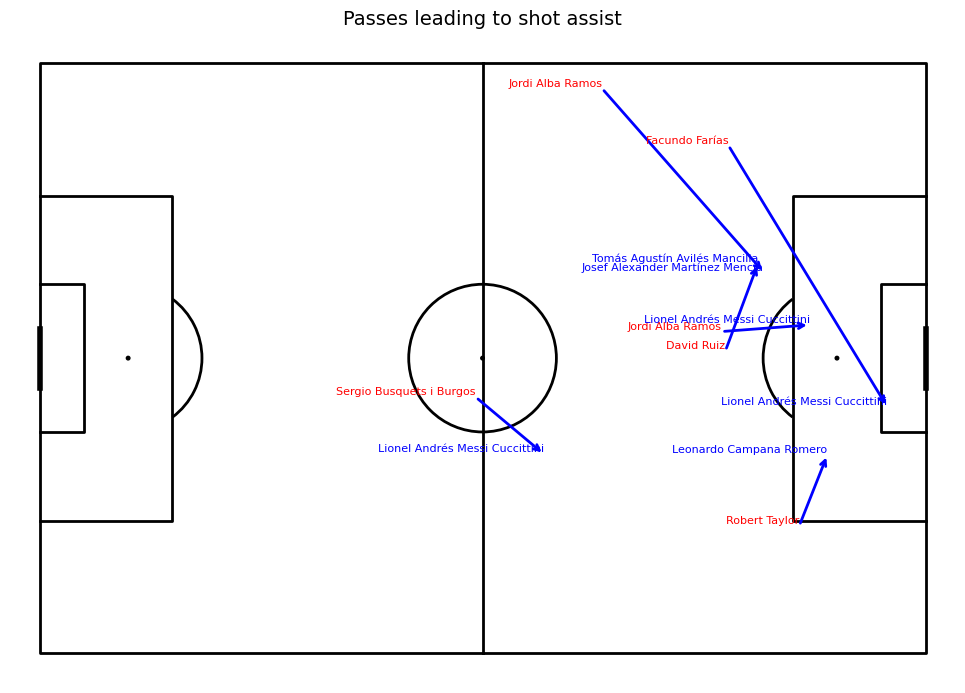

In [44]:
# Dictionary mapping player IDs to player names
player_names = {
    12619: 'Josef Alexander Martínez Mencia',
    5203: 'Sergio Busquets i Burgos',
    225210: 'David Ruiz',
    366752: 'Tomás Agustín Avilés Mancilla',
    18618: 'Serhiy Kryvtsov',
    23828: 'Kamal Miller',
    5211: 'Jordi Alba Ramos',
    32878: 'Facundo Farías',
    5503: 'Lionel Andrés Messi Cuccittini',
    42373: 'Drake Callender',
    3658: 'DeAndre Yedlin',
    205682: 'Noah Allen',
    29946: 'Robert Taylor',
    225209: 'Benjamin Cremaschi',
    36430: 'Dixon Jair Arroyo Espinoza',
    41824: 'Leonardo Campana Romero'
}


def plot_passes_to_shot_assist(ax, df, team_id, title):
    filtered_df = df[(df['shot_assist'] == True)].copy()

    # Create a Pitch object
    pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black')

    # Plot the passes as arrows with player names
    for i, row in filtered_df.iterrows():
        player_name = player_names.get(row['player_id'], 'Unknown')
        recipient_name = player_names.get(row['recipient'], 'Unknown')
        ax.annotate('', xy=(row['end_location_x'], row['end_location_y']),
                    xytext=(row['x_coord'], row['y_coord']),
                    arrowprops=dict(arrowstyle='->', linewidth=2, color='blue'),
                    annotation_clip=False)
        ax.text(row['x_coord'], row['y_coord'], player_name, fontsize=8, ha='right', va='bottom', color='red')
        ax.text(row['end_location_x'], row['end_location_y'], recipient_name, fontsize=8, ha='right', va='bottom', color='blue')

    # Set the title
    ax.set_title(title, fontsize=14)

# Create a figure and axes for subplot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot passes leading to shot assist
plot_passes_to_shot_assist(ax, shot_assist_true_df, 1975, 'Passes leading to shot assist')

# Draw the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black')
pitch.draw(ax=ax)

# Display the plot
plt.tight_layout()
plt.show()


**Findings**

*Key Players in terms of degree centrality (top 5):*

- Player: Sergio Busquets i Burgos, Degree Centrality: 1.93
- Player: Facundo Farías, Degree Centrality: 1.93
- Player: Serhiy Kryvtsov, Degree Centrality: 1.73
- Player: DeAndre Yedlin, Degree Centrality: 1.73
- Player: Kamal Miller, Degree Centrality: 1.67


*Most Frequent Passing Combinations (top 5):*

- Serhiy Kryvtsov <-> Kamal Miller: 33 passes
- DeAndre Yedlin <-> Robert Taylor: 26 passes
- Sergio Busquets i Burgos <-> Kamal Miller: 24 passes
- Robert Taylor <-> Noah Allen: 21 passes
- David Ruiz <-> Tomás Agustín Avilés Mancilla: 21 passes


*Players Whose Passes Lead to Shots:*

- Sergio Busquets i Burgos
- David Ruiz
- Jordi Alba Ramos
- Facundo Farías
- Robert Taylor


*Top 5 Average Passing Distances:*

  - Player: Kamal Miller -> Drake Callender
    - Average Passing Distance: 26.482263
    
  - Player: Facundo Farías -> DeAndre Yedlin
    - Average Passing Distance: 25.516114
    
  - Player: Kamal Miller -> Noah Allen
    - Average Passing Distance: 22.137349
    
  - Player: Kamal Miller -> Jordi Alba Ramos
    - Average Passing Distance: 21.835597
    
  - Player: Serhiy Kryvtsov -> Kamal Miller
    - Average Passing Distance: 21.815811


*Key players to stop considering everything we have analyzed:*
- Sergio Busquets i Burgos
- Facundo Farías
- Serhiy Kryvtsov
- DeAndre Yedlin
- Kamal Miller